# Problem Statement

**We have been hired as a consultant to a recently launched startup that is running a targeted marketing campaign on Facebook. The company wants to analyze customer behaviour by predicting which customer clicks on the advertisement**

##### Data Summary:
Dataset Name: "Clicks_Dataset"
The dataset contains 499 records with 5 attributes and 1 outcome variable which is whether an ad was clicked on or not
- **Name**: Name of the User
- **e-mail**: Email ID of the User
- **Country**: Domicile country of the user
- **Time Spent on Site**: Time spent by user on social media platform (in mins)
- **Salary**: Approximate Salary/Income of the user

Target Variable
- **Clicked**: Whether the ad was clicked on or not

#### Importing Libraries, data, and getting the summary of the data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:
# read the data using pandas dataframe
clicks_df = pd.read_csv(r"D:\Projects\XGBoost\AdClicks\clicks_dataset.csv", encoding='ISO-8859-1')

In [4]:
# Show the data head!
clicks_df.head()

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0


In [5]:
# Show the data tail!
clicks_df.tail()

,Names,emails,Country,Time Spent on Site,Salary,Clicked
494,Rigel,egestas.blandit.Nam@semvitaealiquam.com,Sao Tome and Principe,19.222746,44969.13495,0
495,Walter,ligula@Cumsociis.ca,Nepal,22.665662,41686.20425,0
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,35.320239,23989.80864,0
497,Pearl,penatibus.et@massanonante.com,Philippines,26.539170,31708.57054,0
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,32.386148,74331.35442,1


In [13]:
clicks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Names               499 non-null    object 
 1   emails              499 non-null    object 
 2   Country             499 non-null    object 
 3   Time Spent on Site  499 non-null    float64
 4   Salary              499 non-null    float64
 5   Clicked             499 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 23.5+ KB


#### Exploratory Data Analysis

In [11]:
click = clicks_df[clicks_df['Clicked']==1]
no_click = clicks_df[clicks_df['Clicked']==0]

In [12]:
print("Total =", len(clicks_df))

print("Number of customers who clicked on Ad =", len(click))
print("Percentage Clicked =", 1.*len(click)/len(clicks_df)*100.0, "%")
 
print("Did not Click =", len(no_click))
print("Percentage who did not Click =", 1.*len(no_click)/len(clicks_df)*100.0, "%")
 
        

Total = 499
Number of customers who clicked on Ad = 250
Percentage Clicked = 50.1002004008016 %
Did not Click = 249
Percentage who did not Click = 49.899799599198396 %


We've separated the dataset into two variables for users who clicked on the ad and those who didn't. Taking the length of each of the individual subsets, and dividing them by the main dataset has given us info on the total number of users and percentage of users who did and did not click on the ad

In [14]:
clicks_df.describe()

,Time Spent on Site,Salary,Clicked
count,499.000000,499.000000,499.000000
mean,32.920178,52896.992469,0.501002
std,9.103455,18989.183150,0.500501
min,5.000000,20.000000,0.000000
25%,26.425044,38888.117260,0.000000
50%,33.196067,52840.913110,1.000000
75%,39.114995,65837.288190,1.000000
max,60.000000,100000.000000,1.000000


Since we don't actually have age data, it is difficult to be certain, but under the Salary column there seem to be few values that are extremely low, and may not be actual salaries but rather allowances for teenage students. Although it is an assumption, and to ascertain anything would require more data

<Axes: xlabel='Time Spent on Site', ylabel='Salary'>

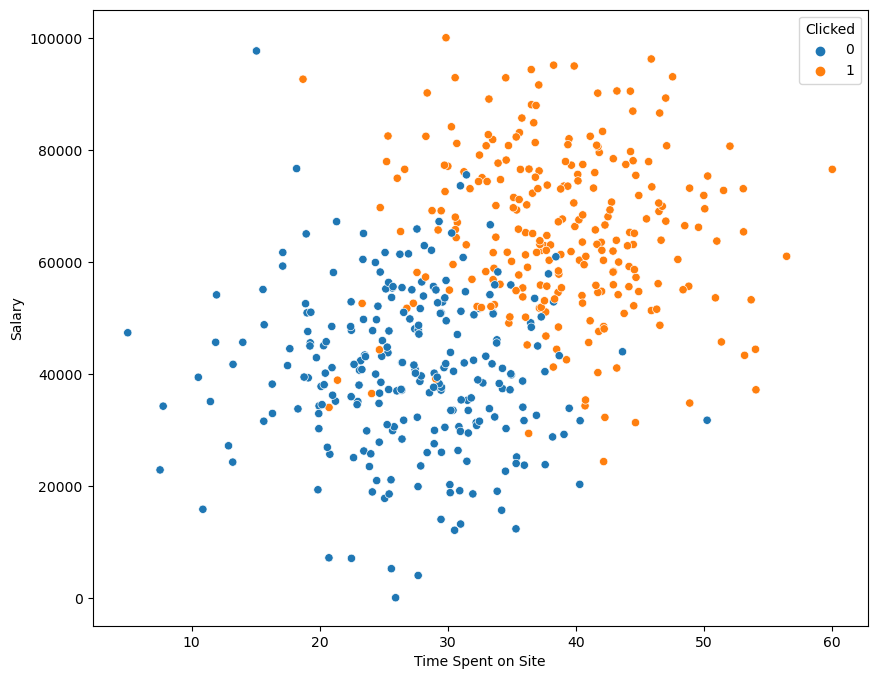

In [17]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=clicks_df['Time Spent on Site'],y=clicks_df['Salary'],hue=clicks_df['Clicked'])

The relationship between the Time spent on sit and salary of the user seem to have a positive correlation although there are wide variations.
But when it comes to clicking on the ad, there seems to be a very clear relationship here with users clicking on the ad lying well on the higher side of both usage and income

Text(0.5, 1.0, 'Correlation Plot')

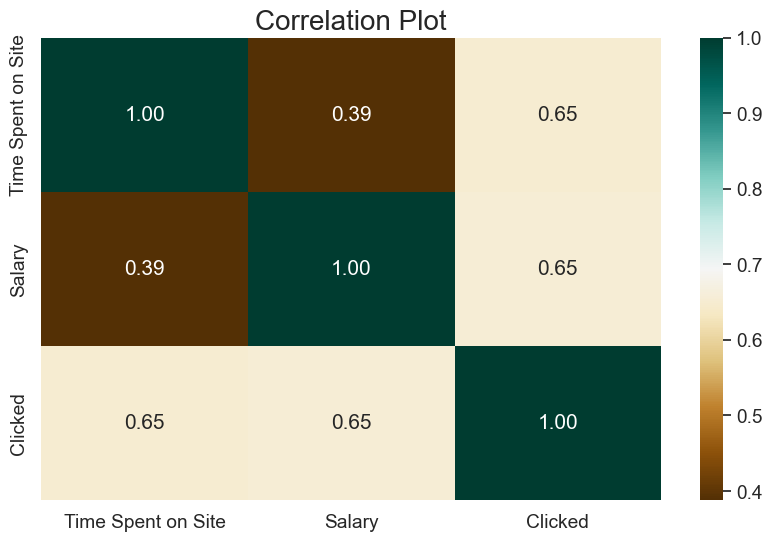

In [8]:
matrix = clicks_df.iloc[:,3:]
f,ax = plt.subplots(figsize=(10, 6))
sns.heatmap(matrix.corr(), annot=True, fmt= '.2f',ax=ax, cmap="BrBG")
sns.set(font_scale=1.25)
plt.title("Correlation Plot",fontdict={"fontsize":20})

The correlation map further substantiates the relationship, with moderate correlation between Salary and Time spent, and strong correlation of both attributes with ad clicked

<Axes: xlabel='Clicked', ylabel='Salary'>

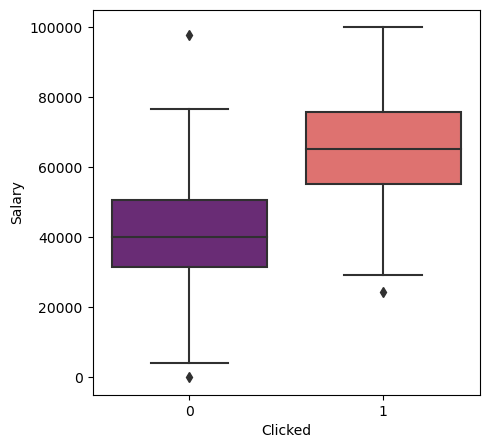

In [26]:
plt.figure(figsize=(5, 5))
sns.boxplot(x=clicks_df['Clicked'],y=clicks_df['Salary'],palette='magma')

Aside from an outlier in the salary for non-clicking users, the salary distribution for non-clickers is substantially lower

<Axes: xlabel='Salary', ylabel='Count'>

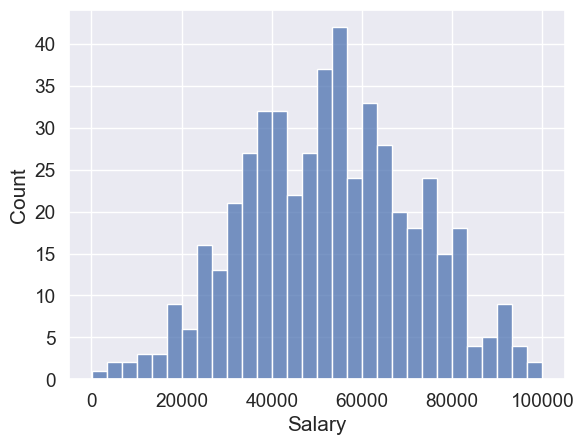

In [12]:
sns.histplot(x=clicks_df['Salary'],bins=30)

The overall salary distribution is more or less normally distributed (Bell Shaped curve) with most users lying around the $55000-60000 range

<Axes: xlabel='Clicked', ylabel='Time Spent on Site'>

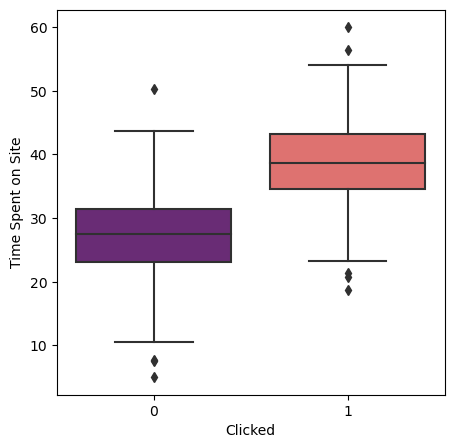

In [33]:
plt.figure(figsize=(5, 5))
sns.boxplot(x=clicks_df['Clicked'],y=clicks_df['Time Spent on Site'],palette='magma')

Similar to salary, time spent of facebook is also higher for users who clicked on the ad

<Axes: xlabel='Time Spent on Site', ylabel='Count'>

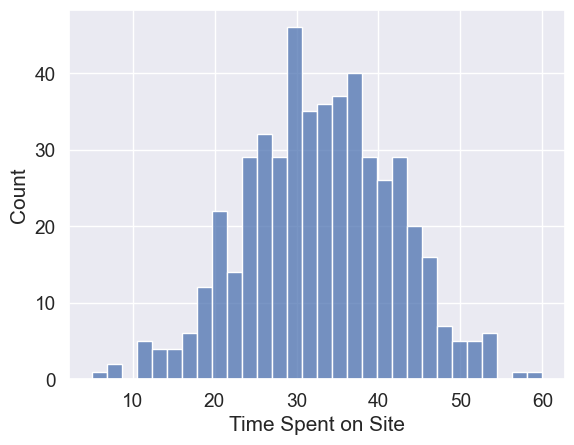

In [11]:
sns.histplot(x=clicks_df['Time Spent on Site'],bins=30)

The overall distribution of Time spent on site also follows the normal distribution.
This aspect of the will be important while running the model. Since we'll be comparing logistic regression and XGBoost models, a bell shaped distribution will help increase the performance of the logistic regression model

#### Training the data and modelling

In [11]:
clicks_df

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0
...,...,...,...,...,...,...
494,Rigel,egestas.blandit.Nam@semvitaealiquam.com,Sao Tome and Principe,19.222746,44969.13495,0
495,Walter,ligula@Cumsociis.ca,Nepal,22.665662,41686.20425,0
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,35.320239,23989.80864,0
497,Pearl,penatibus.et@massanonante.com,Philippines,26.539170,31708.57054,0


We will be dropping Names and emails columns since they will not help us in predictions

We also want to check the distribution of countries in the data to determine if they will be a useful factor in predicting or not

In [35]:
len(clicks_df['Country'].unique())

210

In [43]:
country_count = pd.DataFrame(clicks_df['Country'].value_counts().reset_index())

<Axes: xlabel='count', ylabel='count'>

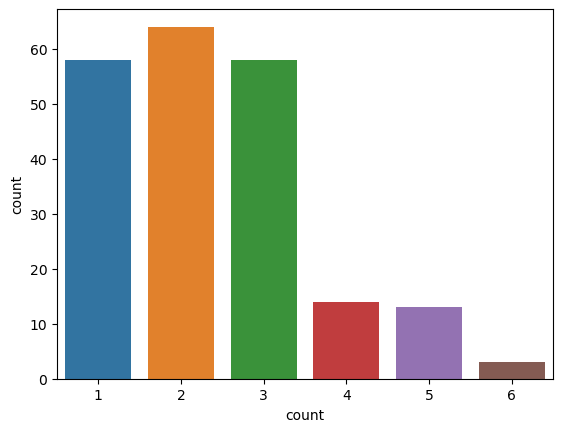

In [44]:
sns.countplot(x='count',data=country_count)

It seems that there are too many unique countries for a small dataset. As a result, individually countries do not have enough records to produce any reliable insights

In [21]:
#Let's drop the emails, country and names
clicks_df.drop(['Names', 'emails', 'Country'],axis=1,inplace=True)

In [46]:
clicks_df

,Time Spent on Site,Salary,Clicked
0,25.649648,55330.06006,0
1,32.456107,79049.07674,1
2,20.945978,41098.60826,0
3,54.039325,37143.35536,1
4,34.249729,37355.11276,0
...,...,...,...
494,19.222746,44969.13495,0
495,22.665662,41686.20425,0
496,35.320239,23989.80864,0
497,26.539170,31708.57054,0


In [22]:
#Let's drop the target coloumn before we do train test split
X = clicks_df.drop('Clicked',axis=1).values
y = clicks_df['Clicked'].values

Since there are only two input variables being considered now and both are being measures in very different scales (Time spent not exceeding 60 minutes, while salaries are all in tens of thousands) we will need to scale the columns so that they can be compared on equal footing and given a balanced weight

In [23]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

We have separated the data into train and test

In [54]:
X_train

array([[-1.82782453e+00, -1.05304777e+00],
       [-4.06046726e-01,  6.73695384e-01],
       [-8.27867118e-01, -2.76806472e-01],
       [-8.10221766e-01, -1.67739289e+00],
       [ 8.32166971e-01,  5.59712614e-01],
       [-7.28129436e-01,  6.59010772e-01],
       [ 3.20818637e-01,  4.36354003e-02],
       [ 4.14921072e-01,  1.68278508e+00],
       [-3.80543438e-01, -8.33300911e-01],
       [-4.37119518e-01, -1.21230079e+00],
       [-2.20285872e-01, -1.78035137e+00],
       [-1.41082303e+00, -7.98440963e-01],
       [-8.55203904e-01,  1.19309732e-01],
       [ 1.02626226e+00,  7.20450068e-01],
       [ 7.99054399e-02, -1.08608789e+00],
       [ 1.75289177e+00,  1.06719582e+00],
       [-4.44161882e-01, -8.06752732e-01],
       [-3.76790524e-01, -8.05747851e-01],
       [ 2.58562316e+00,  4.25883823e-01],
       [-2.76609826e+00, -9.84487785e-01],
       [-9.13201126e-01, -9.58097186e-01],
       [ 1.50793876e+00,  5.77561928e-01],
       [ 1.77112538e-01, -1.19530208e+00],
       [ 1.

In [55]:
y_train

array([0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,

Time to run our first model. We will run a simple **Logistic Regression** model 

In [25]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

In [26]:
logmodel.fit(X_train,y_train)

LogisticRegression()

The model has been trained, and now we must test it. The test data will be predicted using the model to see if it can accurately predict clicks or not

In [28]:
logpred = logmodel.predict(X_test)
logpred

array([1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

In [59]:
y_test

array([1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

To present the predictions made by the model and compare the predictions with the actual values, we use the confusion matrix and the classification report. The most popular methods of measuring classification models' accuracy

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
print(logmodel.score(X_train,y_train))
print(logmodel.score(X_test,y_test))

0.8897243107769424
0.97


The model score tells us the mean accuracy of the model on a set of input variables and its true output values. The logistic regression model has performed exceptionally well on the test data with 0.97 or 97% accuracy

<Axes: >

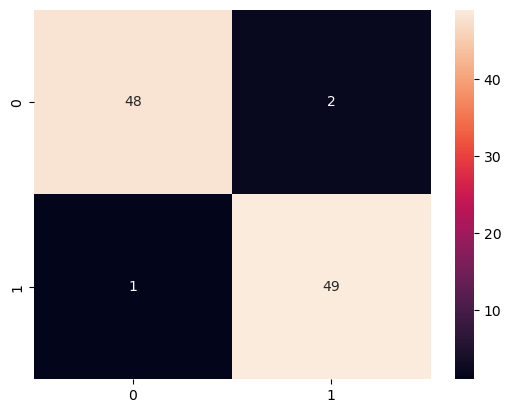

In [69]:
cm = confusion_matrix(y_test, logpred)
sns.heatmap(cm, annot=True, fmt="d")

The 97% accuracy is visible in the confusion matrix as well with just 3 misclassifications in 100 total classifications

In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test, logpred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        50
           1       0.96      0.98      0.97        50

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



The classification report gives a summary of the performance of the model and its predictions by calculating the performance metrics accuracy, precision, recall and f1 score by comparing the actual values of the test data and the predicted values. Our logmodel has done extremely well in all metrics
- **Precision**: True Positives / (True Positives + False Positives)
       Precision is a metric used in classification tasks to evaluate the accuracy of positive predictions made by a model. It answers the question: "Of all the positive predictions made by the model, how many were actually correct?" 

- **Recall:** True Positives / (True Positives + False Negatives)
       Recall, also known as sensitivity or true positive rate, measures the ability of a model to identify all relevant instances of the positive class. It answers the question: "Of all the actual positive cases, how many did the model correctly identify?"

- **Accruacy**: (True Positives + True Negatives) / Total Predictions
        Accuracy is a common evaluation metric for classification models, representing the overall correctness of the model's predictions. It answers the question: "What portion of all predictions (both positive and negative) were correct?"

- **F1-Score**: 2 * (Precision * Recall) / (Precision + Recall)
        The F1 score is a metric that balances precision and recall into a single value. It helps in assessing a model's overall performance, considering both false positives and false negatives. The F1 score is the harmonic mean of precision and recall. It is useful when there is a need to balance the trade-off between precision and recall. A higher F1 score indicates that the model achieves both high precision and high recall, striking a balance between minimizing false positives and false negatives.
        
In our case here, a Positive would be clicking on the ad, and a Negative would mean not clicking the ad

#### Using Contour Plots to assess the performance of the model

There is another way of using visuals to assess the performance of a classification model using a contour plot which we are going to use here with a mesh grid. A mesh grid as the name suggests will allow us to create a 2d grid where we can fix the limits of the grid values to our standardized X variable values (Time spent on site and Salary).

Using Contour Plots with the mesh grid will give us a visual that is separated by colours to give the decision boundary of values for Time spent and Salary. Based on this boundary, our model has classified the values. On top of this we can plot a scatterplot of values for time spent vs salary while colouring the points based on whther the ad was clicked or not. Note that we will use the true value for ad clicked and not the predicted one, since the predicted values will obviously lie completely in their respective decision areas. The idea is to find out which of the actual values were outside of their decision areas made by the model

In [47]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train

# Create a meshgrid ranging from the minimum to maximum value for both features

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))


Creating the mesh grid or the range of values for our visual

In [32]:
y_train.shape

(399,)

In [33]:
X_train.shape

(399, 2)

In [34]:
X1.shape

(728, 805)

In [39]:
X2.shape

(670, 675)

(-3.787379255660188, 3.482620744339657)

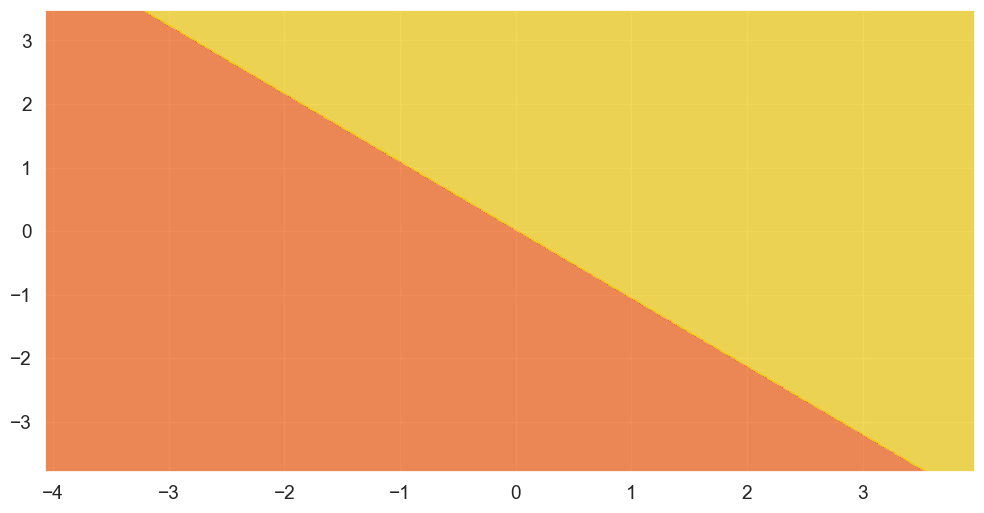

In [49]:
plt.figure(figsize=(12,6))
plt.contourf(X1, X2, logmodel.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('#EA6620', '#ECCA1D')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

Now lets create a standard scatterplot for all values of Salary and Time spent based on whether the ad was clicked or not

C:\Users\HP\AppData\Local\Temp\ipykernel_17392\3274458153.py:4: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



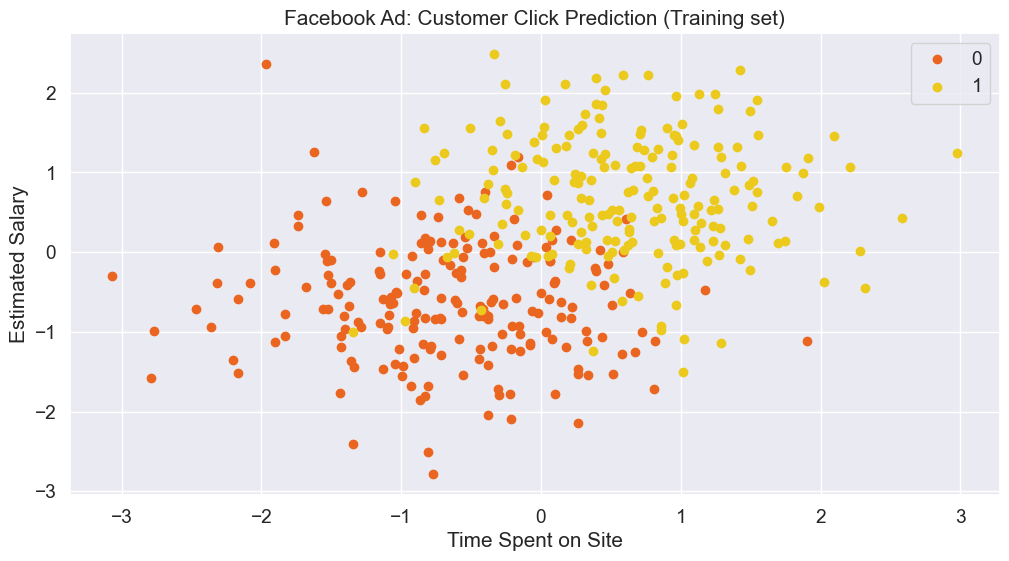

In [50]:
# plot all the actual training points
plt.figure(figsize=(12,6))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('#EA6620', '#ECCA1D'))(i), label = j)
    
plt.title('Facebook Ad: Customer Click Prediction (Training set)')
plt.xlabel('Time Spent on Site')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Plotting them together now to see where the actual values lies when compared to the decision boundaries

C:\Users\HP\AppData\Local\Temp\ipykernel_17392\2659952636.py:11: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



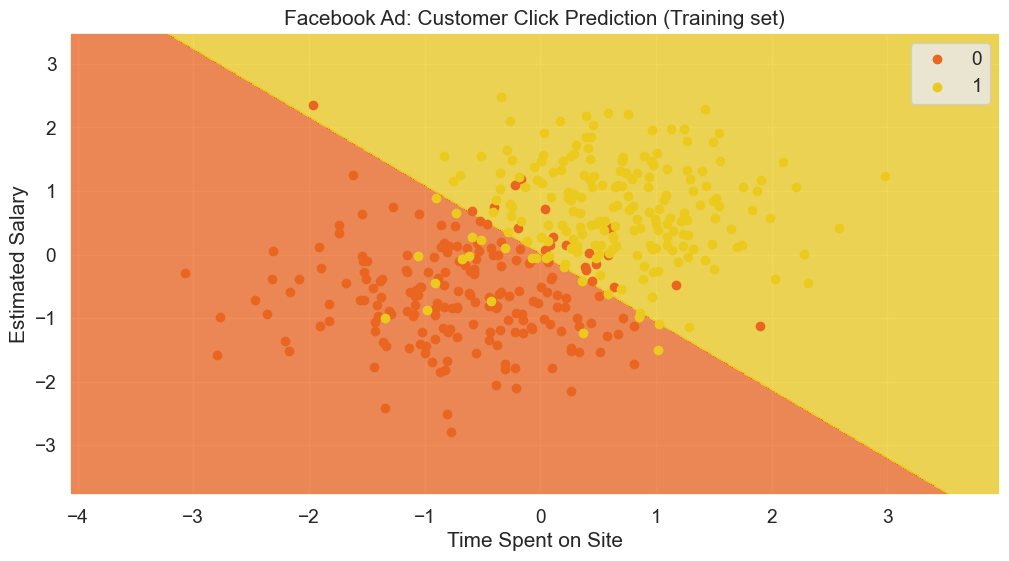

In [46]:
# Visualising the Training set results
plt.figure(figsize=(12,6))
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, logmodel.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('#EA6620', '#ECCA1D')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('#EA6620', '#ECCA1D'))(i), label = j)
plt.title('Facebook Ad: Customer Click Prediction (Training set)')
plt.xlabel('Time Spent on Site')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_17392\4200289557.py:12: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



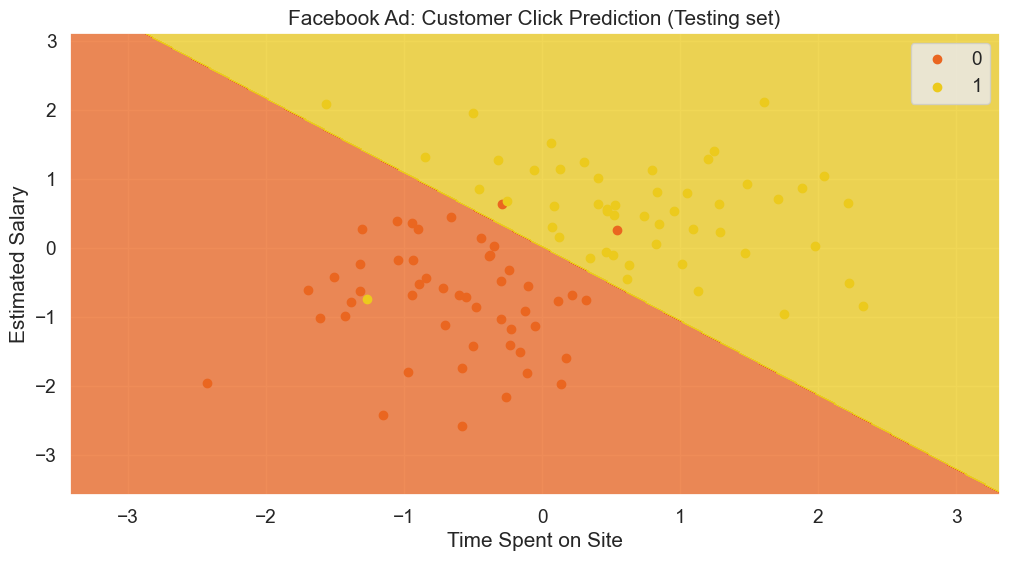

In [51]:
# Visualising the testing set results
from matplotlib.colors import ListedColormap
plt.figure(figsize=(12,6))
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, logmodel.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('#EA6620', '#ECCA1D')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('#EA6620', '#ECCA1D'))(i), label = j)
plt.title('Facebook Ad: Customer Click Prediction (Testing set)')
plt.xlabel('Time Spent on Site')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

As we had seen before, our model performed far better on the test set than the training set as a result of which, data points lying in the wrong area are very few in the test data visual (only 3), while there are quite a few points misclassified in the training data (relatively)

We can now implement a more advanced model of classification to compare with our logistic regression model. While there is not much room to improve compared to the result we've already achieved, we must still try it to make sure we move ahead with the model that is the best performing and therefore the most useful for the business

In [91]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score

In [97]:
cv_params = {"max_depth":[2,3,4,5],
            'min_child_weight':[1,2,3,4,5],
            'learning_rate':[0.1,0.2,0.3],
            'n_estimators':[75,100,125,150]
            }
xgb = XGBClassifier(objective='binary:logistic')

xgb_cv = GridSearchCV(xgb,cv_params,scoring='f1',refit='f1')

To make best use of an ensembling model like XGBoost, its best to have a Cross Validation of the model with different possible combinations of hyperparameters. While the more combinations we provide, the better will the final model performance, this process can take a lot of time depending on the data and the combinations we provide. While this is a fairly small dataset, we would have to be careful in crossvalidations with GridSearch in datasets with hundreds of thousands of even millions of rows, since that could take..quite a while

In [98]:
%%time
xgb_cv.fit(X_train,y_train)

CPU times: total: 3min 22s
Wall time: 1min 25s


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [2, 3, 4, 5],
                         'min_child_weight': [1, 2, 3, 4, 5],
                         'n_estimators': [75, 100, 125, 150]},
             refit='f1', scoring='f1')

As visible from the time command, the total time it took to train the model with all combinations and come up with the best performing one, took a total of 3 mins 22s, while the logistic regression model was instant here. The time taken, will only increase with the size and complexity of the data

In [99]:
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 1,
 'n_estimators': 100}

In [100]:
xgb_cv.best_score_

0.8800398998591769

Surprisingly, XGBoost has performed noticeably weaker than logistic regression. This may be due to the fact that the data is quite simple with only 2 continouos variables to predict with, the fact that both variables are almost normally distributed, and the fact that its a binary prediction. In a simple dataset like this, that is in compliance with the main requirements and assumptions of the Logistic Regression function, it is not inconceivable that the logistic model performs better. Had the data been more complex with more categorical as well as continouos variables, skewed, or biased data, the XGBoost model would most certainly perform better

In [101]:
xgpredict = xgb_cv.predict(X_test)

<Axes: >

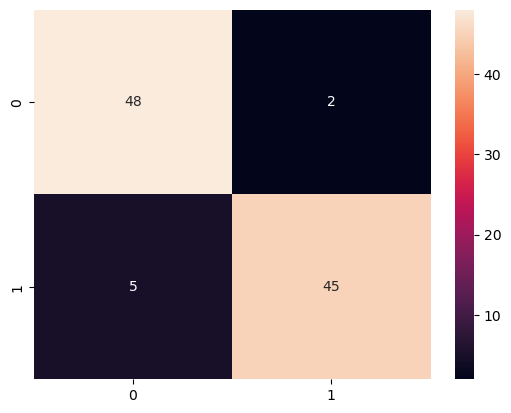

In [103]:
cm = confusion_matrix(y_test, xgpredict)
sns.heatmap(cm, annot=True, fmt="d")

**Conclusion**
The predictions of the XGBoost model are slightly weaker than the Logistic model with a 93% accuracy as opposed to the logistic model's 97%. The possible reasons for it have already been discussed. An improvement over 97% was a remote possibility to begin with. Given our current results though, we can safely proceed with the Logistic regression model for target marketing.

**However, the limitations of this analysis and the predictions must also be noted**

- The dataset had very few records, and to have a higher confidence in the model, it must be tested on a much larger dataset
- There is also the fact that a user's probability of clicking on an ad cannot just be reliably predicted using their salary and time spent on social media. There are business specific elements to it. Like if there's seasonality involved in the company's business. It's unlikely that their ads will be noticed during the off season. Ad clicks on competing products and related products, all need to be tracked to have a comprehensive analysis and prediction of ad clicks
- The Salary/Income of the users has been standardized to US dollars. However, the users are from all around the world which gives rise to the problem of **Purchasing Power Parity (PPP)**, which is a concept used to compare the prices of a standard group (basket) of commodities at a common currency, which can differ wildly around the world. Most notably, North American and Western European nations tend to be far more expensive than other regions.
- This difference in PPP means that a certain income in US dollars may mean a lot of money for a user in one country, while in another country the same income would be considered low. To account for such differences, incomes of users collected in local currencies must be converted to one standard currency using the Purchasing power parity method. Although, for this dataset, we do not actually know if it was done.